In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [2]:
# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [4]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [5]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.45 | lr:0.004078138027841291, weight decay:7.778606538354785e-05
val acc:0.14 | lr:0.0008435001041959941, weight decay:1.964349045176628e-08
val acc:0.75 | lr:0.005917264799024076, weight decay:3.572460518647969e-05
val acc:0.11 | lr:0.00026250144885286807, weight decay:5.3034756853794414e-08
val acc:0.2 | lr:0.0007094022892444047, weight decay:8.462083813599991e-08
val acc:0.38 | lr:0.00315739153859146, weight decay:2.213708724613548e-06
val acc:0.35 | lr:0.001465466082933023, weight decay:1.5107393859406496e-05
val acc:0.09 | lr:0.00017891411765308835, weight decay:2.6754715137082512e-05
val acc:0.09 | lr:4.6672129703699275e-05, weight decay:4.0831470309414395e-05
val acc:0.1 | lr:9.870055289508666e-06, weight decay:7.6983858723856e-06
val acc:0.04 | lr:9.070956471628048e-06, weight decay:7.478479504550702e-08
val acc:0.09 | lr:6.254461555154104e-06, weight decay:9.597354233916756e-08
val acc:0.13 | lr:3.707750657742246e-05, weight decay:3.6742955712114154e-06
val acc:0.29 

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.77) | lr:0.006983891262893993, weight decay:1.1828384392604019e-07
Best-2(val acc:0.75) | lr:0.005917264799024076, weight decay:3.572460518647969e-05
Best-3(val acc:0.75) | lr:0.00735657786089158, weight decay:1.0842954638191898e-06
Best-4(val acc:0.74) | lr:0.008188531065945338, weight decay:2.823261798974336e-05
Best-5(val acc:0.73) | lr:0.006596239083521663, weight decay:2.3427198689473167e-06
Best-6(val acc:0.72) | lr:0.008065123076225332, weight decay:7.819595604786283e-05
Best-7(val acc:0.63) | lr:0.0068809624875418775, weight decay:6.646550228770943e-05
Best-8(val acc:0.52) | lr:0.0033740586322564994, weight decay:3.126237481148089e-08
Best-9(val acc:0.52) | lr:0.004786787453073021, weight decay:1.4532558757259019e-08
Best-10(val acc:0.51) | lr:0.0020804864564684987, weight decay:4.9832171130566234e-05
Best-11(val acc:0.48) | lr:0.003715299696645926, weight decay:5.34060763525411e-07
Best-12(val acc:0.4

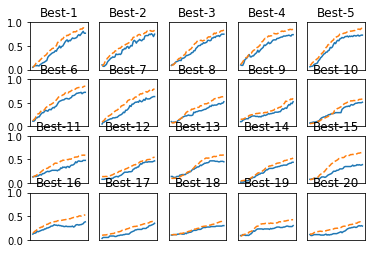

In [7]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

In [8]:
# 결과를 통해 축소된 범위로 반복 수행